In [1]:
# We start by loading the libraries we're going to use
import pandas as pd

In [5]:
# Here we store the paths to the data files
# Remember to change this in case your folder structure is different
weather_df = pd.read_csv("../fyp2022p0105/data/raw/weather/weather.csv")

# First task: the number of observation and of variables is the shape of the dataframe
print(weather_df.shape)

(20220, 9)


In [6]:
# Second task: check for missing values. We start by asking if there's any NA
print(weather_df.isna().any().any()) # There aren't any! We're so lucky, this never happens normally :-)

# Now we check if there's a variable that needs special treatment
# In this case, temperature is reported in kelvins, but we'd like it in celsius instead
# Careful if you run this cell more than once!
weather_df["TemperatureAboveGround"] = weather_df["TemperatureAboveGround"] - 273.15

# Third task, filter the dataframe to contain only the data bout the country of interest
# We do so by checking the iso3166-2 code of the country: it needs to start with the iso3166 code!
weather_df = weather_df[weather_df["iso3166-2"].str.startswith("DK")]

# Fourth task: summary statistics by region
# Standard pandas groupby here...
weather_by_region = weather_df.groupby(by = "iso3166-2").agg(["min", "mean", "median", "max"])
weather_by_region

False


RelativeHumiditySurface                                   \
                              min       mean     median        max   
iso3166-2                                                            
DK-81                   46.166826  81.055723  82.495994  98.183444   
DK-82                   49.033149  81.566104  83.703552  98.192610   
DK-83                   50.835916  80.914819  82.252746  96.980902   
DK-84                   50.049442  78.592708  79.835315  96.115837   
DK-85                   50.719733  79.364675  80.494326  96.581381   

          SolarRadiation                                            \
                     min          mean        median           max   
iso3166-2                                                            
DK-81           0.000000  6.998678e+06  4.519063e+06  2.407046e+07   
DK-82           0.005224  6.660075e+06  3.965236e+06  2.392633e+07   
DK-83           0.000000  6.768604e+06  4.503614e+06  2.403996e+07   
DK-84          85.014818  6.912021e+06  4.686215e+06  2.283164e+07   
DK-85         270.216521  7.163466e+06  4.990226e+06  2.349346e+07   

          Surfacepressure                ... Totalprecipitation            \
                      min          mean  ...             median       max   
iso3166-2                                ...                                
DK-81        2.342712e+06  2.424567e+06  ...           0.000765  0.018153   
DK-82        2.342463e+06  2.420853e+06  ...           0.000803  0.025882   
DK-83        2.346761e+06  2.424560e+06  ...           0.000773  0.024844   
DK-84        2.359255e+06  2.428423e+06  ...           0.000835  0.041373   
DK-85        2.355432e+06  2.428640e+06  ...           0.000696  0.026545   

          UVIndex                                  WindSpeed            \
              min       mean     median        max       min      mean   
iso3166-2                                                                
DK-81         0.0  14.137697   9.979405  44.536232  0.977651  4.789387   
DK-82         0.0  14.285644   9.993017  44.405486  0.804547  4.128445   
DK-83         0.0  15.077168  10.867238  43.914882  1.167244  4.548929   
DK-84         0.0  14.931567  11.106236  43.076212  0.839867  4.317130   
DK-85         0.0  15.076703  11.327366  43.986360  1.219587  4.478090   

                                
             median        max  
iso3166-2                       
DK-81      4.449917  12.426109  
DK-82      3.821016  11.173086  
DK-83      4.236949  12.495682  
DK-84      3.918726  10.487981  
DK-85      4.192292  11.374737  

[5 rows x 28 columns]

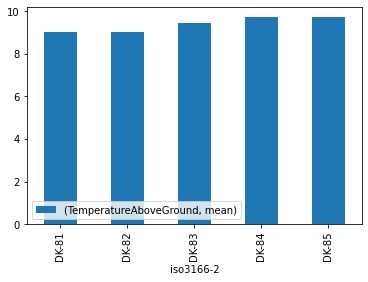

In [7]:
# To plot, we use pandas built-in support for matplotlib
# Any data series can be plotted by calling ".plot.<plottype>()"
# <plottype> is the type of plot you want to show. I this case, let's go for bars.
# Since we have a multi index on the columns, we need to slice it, pandas style
idx = pd.IndexSlice
weather_by_region.loc[:, idx["TemperatureAboveGround", :, :]].plot.bar(y = ("TemperatureAboveGround", "mean")).legend(loc = "lower left")

In [8]:
# Let's now aggregate by date, in this case we only want the mean (no multi index any more, phew!)
weather_by_day = weather_df.groupby(by = "date").mean()
weather_by_day

,RelativeHumiditySurface,SolarRadiation,Surfacepressure,TemperatureAboveGround,Totalprecipitation,UVIndex,WindSpeed
date,,,,,,,
2020-02-13,86.285064,2.422044e+06,2.404600e+06,3.636417,1.748400e-03,2.821490,4.423935
2020-02-14,87.398512,2.369072e+06,2.430333e+06,3.804369,7.356000e-04,1.513631,2.891248
2020-02-15,91.785362,1.906938e+05,2.416947e+06,6.470372,6.405000e-03,0.063312,7.025087
2020-02-16,88.155680,1.201935e+04,2.373562e+06,8.500593,1.473980e-02,0.016280,9.958726
2020-02-17,79.079660,3.399493e+06,2.390946e+06,6.633759,1.039200e-03,1.635729,10.505559
...,...,...,...,...,...,...,...
2021-02-11,75.114792,3.509902e+06,2.469831e+06,-5.950823,5.026000e-04,1.816026,3.811492
2021-02-12,76.028840,4.770705e+06,2.488004e+06,-6.465307,2.740000e-05,2.808084,2.553985
2021-02-13,80.648427,4.902966e+06,2.492454e+06,-5.182194,4.000000e-07,2.969096,1.666899


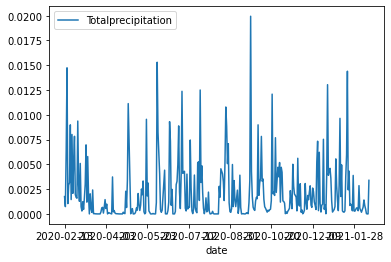

In [9]:
# Same as above, plot via pandas' bindings
weather_by_day.loc[:, "Totalprecipitation"].plot.line().legend(loc = "upper left")